# Data Science - Regression Analysis

### Regression analysis are used to depict the relationship between multiple variables. There are two basic types of regression models, linear regression and logistic regression. 

### Linear regression is commonly used for value prediction (numerical), while logistic regression is commonly used for data classification (categorical).

## Set Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load the insurance data.
insuranceDF = pd.read_csv("data/insurance.csv")
# Create a new column with smoker column as a numerical value.
insuranceDF["smoker numerical"] = (insuranceDF["smoker"] == "yes").astype(int)
insuranceDF

,age,sex,bmi,children,smoker,region,charges,smoker numerical
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


## Linear Regression

### Linear regression is one way to model the relationship between a dependent variable and one or multiple independent variable. When constructing a linear model, we are attempting to fit the data into the formula $\hat{Y}=X\theta$, where $\hat{Y}$ is the prediction vector, $X$ is the design matrix, and $\theta$ is the parameter vector. There are different approaches to create such model (or equation) mathematically. 

### The goal is to use the existing data $X$ and $Y$ data to generate the optimal $\theta$ used for later prediction.

### Note: $\hat{Y}$ is a matrix of size $n\times1$. $X$ is a matrix of size $n\times(p+1)$. $\theta$ is a matrix of size $(p+1)\times 1$ 

### You can think of $\hat{Y}=X\theta$ as the classic $y = mx + b$ but now expanded to cover multiple $x$ (independent variables) and to make predictions $y$ (dependent variable) for multiple people at once.

### Suppose you wish to explore the relationship between age and insurance charges.

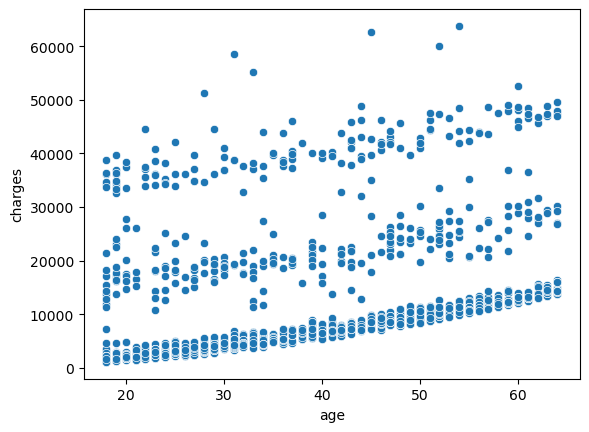

In [3]:
sns.scatterplot(data=insuranceDF, x="age", y="charges")
plt.show();

### What would we expect based on the plot? Here we can see a positive correlation between age and insurance charges. However, we also see visual stratification into 3 grouping. 

### Let us try running the linear regression model now.

In [4]:
# Split our dataset to training and testing datasets.
linData1_tr, linData1_te = train_test_split(insuranceDF, test_size=0.1, random_state=42)
linData1_tr.reset_index(inplace=True, drop=True)
linData1_te.reset_index(inplace=True, drop=True)

# Create the X and Y matrix for model training.
linTraining1X = linData1_tr[["age"]].to_numpy()
linTraining1Y = linData1_tr["charges"].to_numpy()

# Creating the linear regression model.
linModel1 = LinearRegression(fit_intercept=True)
linModel1.fit(linTraining1X, linTraining1Y)

# Resulting linear regression model parameters.
linModel1.intercept_, linModel1.coef_

(3426.437782561261, array([252.37092343]))

### We can plot the linear regression model ("line of best fit") using the model parameters.

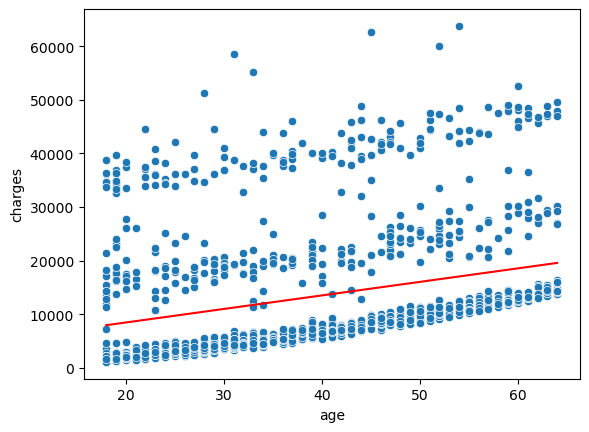

In [5]:
# Plot of the data with the linear regression line.
sns.scatterplot(data=insuranceDF, x="age", y="charges")
# Plot of the linear regression line.
plt.plot(np.linspace(18, 64, 1000), 
         linModel1.predict(np.reshape(np.linspace(18, 64, 1000), (-1, 1))), color="red")
plt.show();

### After training the model, we can now use it to make predictions. Note the structure of the input and output values.

In [6]:
# Use the model to make predictions (Age).
linModel1.predict([[25]])

array([9735.71086837])

### We should also check the accuracy of the regression model. Note that the score is relatively low (on a scale of 0 to 1). 

In [7]:
# The score tells you the accuracy of the regression model.
# You should use the test dataset for the score calculation.
linModel1.score(linData1_te[["age"]].to_numpy(), linData1_te["charges"].to_numpy())

0.12425654514465179

### This time, we want to explore the relationship between all the numerical variables and insurance charges.

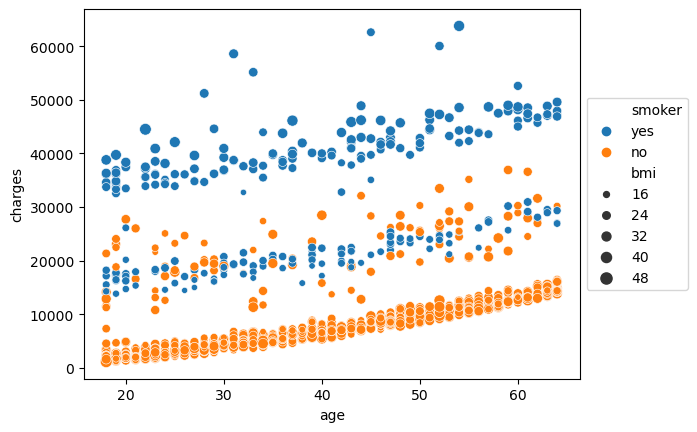

In [8]:
# Scatterplot capturing four features/dimensions.
sns.scatterplot(data=insuranceDF, x="age", y="charges", hue="smoker", size="bmi");
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show();

### What would we expect based on the plot? Now that we are working with multiple dimension/features, it is much harder to visualize the data and identify patterns. 

### Let us try running the linear regression model now.

In [9]:
# Split our dataset to training and testing datasets.
linData2_tr, linData2_te = train_test_split(insuranceDF, test_size=0.1, random_state=24)
linData2_tr.reset_index(inplace=True, drop=True)
linData2_te.reset_index(inplace=True, drop=True)

# Create the X and Y matrix for model training.
linTraining2X = linData2_tr.drop(["sex", "charges", "smoker", "region"], axis=1).to_numpy()
linTraining2Y = linData2_tr["charges"].to_numpy()

# Creating the linear regression model.
linModel2 = LinearRegression(fit_intercept=True)
linModel2.fit(linTraining2X, linTraining2Y)

# Resulting linear regression model parameters.
linModel2.intercept_, linModel2.coef_

(-12209.519360744462,
 array([  256.96955249,   326.78276542,   501.42822246, 23656.91652839]))

### After training the model, we can now use it to make predictions. Note the structure of the input and output values.

In [10]:
# Use the model to make predictions (Age, BMI, # Children, Smoker - 0 or 1).
linModel2.predict([[30, 25, 0, 0]])

array([3669.13634959])

### We should also check the accuracy of the regression model. Notice that the accuracy is improved when we incorporate additional relevant features into the model.

In [11]:
# The score tells you the accuracy of the regression model.
# You should use the test dataset for the score calculation.
linModel2.score(linData2_te.drop(["sex", "charges", "smoker", "region"], axis=1).to_numpy(),
                linData2_te["charges"].to_numpy())

0.7972286594601983

### For more information, check the following:
### - User Guide: https://scikit-learn.org/stable/modules/linear_model.html
### - API Reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
### - Examples: https://scikit-learn.org/stable/auto_examples/index.html#generalized-linear-models

## Logistic Regression

### Logistic regression is a model used to estimate the probability that an event occurred given previous data. When the probability exceeds the threshold value, we considered the event as having occurred. Essentially, logistic regression is used for binary (True/False) classification. This is done by the formula $\hat{P}_\theta (Y = 1|x) = \sigma(x^T\theta)$, where $\theta$ is the linear parameter, $\sigma$ is the sigmoid or logistic function, $x$ is the input feature matrix, and $y$ is the response vector.

### Suppose you wish to determine if you can predict whether a person is a smoker based on their insurance charges.

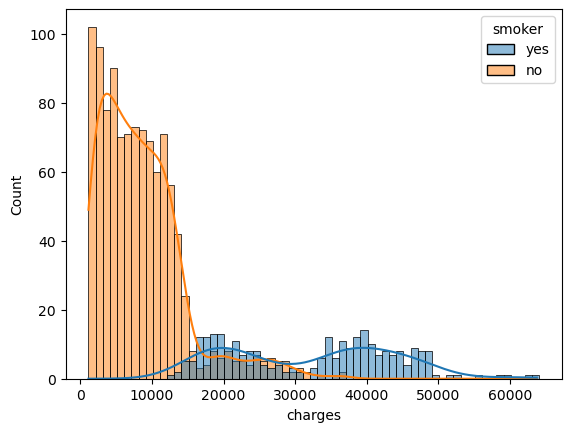

In [12]:
sns.histplot(data=insuranceDF, x="charges", hue="smoker", binwidth=1000, kde=True);
plt.show();

### What would we expect based on the plot? With this plot, it might be hard to determine the best cutoff point, but there is an area of overlap between charges of approximately 15000 to 30000.

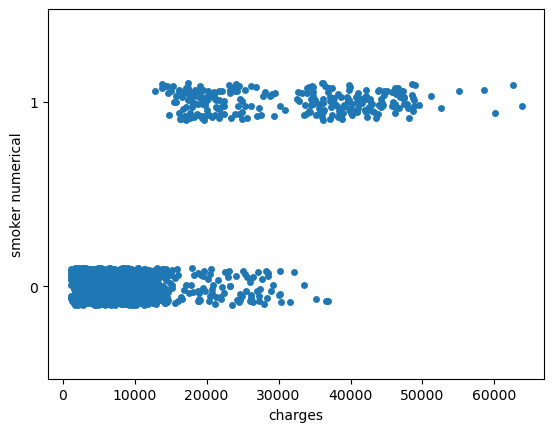

In [13]:
# A stripplot is a categorical scatterplot that uses jittering to reduce over plotting.
sns.stripplot(data=insuranceDF, x="charges", y="smoker numerical", jitter=0.1, orient='h').invert_yaxis()
plt.show();

### Here is a different plot depicting the same data.

### Let us try running the logistic regression model now.

In [14]:
# Split our dataset to training and testing datasets.
logData1_tr, logData1_te = train_test_split(insuranceDF, test_size=0.1, random_state=21)
logData1_tr.reset_index(inplace=True, drop=True)
logData1_te.reset_index(inplace=True, drop=True)

# Create the X and Y matrix for model training.
logTraining1X = logData1_tr[["charges"]].to_numpy()
logTraining1Y = logData1_tr["smoker numerical"].to_numpy()

# Creating the logistic regression model.
logModel1 = LogisticRegression(fit_intercept=True)
logModel1.fit(logTraining1X, logTraining1Y)

# Resulting logistic regression model parameters.
logModel1.intercept_, logModel1.coef_

(array([-5.70180672]), array([[0.00024973]]))

### We can plot the logistic regression model using the model parameters. Note that logistic regression is based on the sigmoid or logistic function.

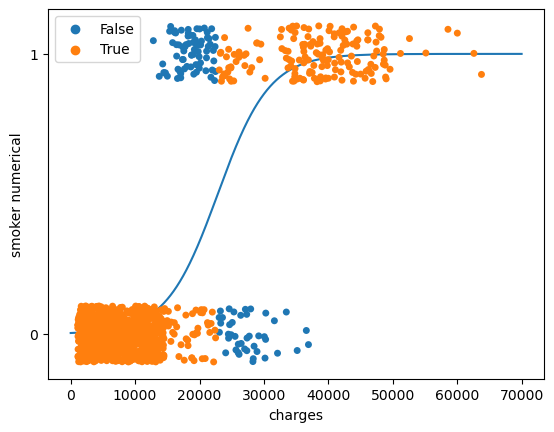

In [15]:
# Sigmoid or logistic function.
def sigmoid(x):
    return 1/(1 + np.exp(-x))

log_theta_0 = logModel1.intercept_[0]
log_theta_1 = logModel1.coef_[0]

# Does the prediction match the actual data.
log_smoke_pred_match = logModel1.predict(logData1_tr[["charges"]].to_numpy())==logData1_tr["smoker numerical"]

# Plot of the training data.
sns.stripplot(x=logData1_tr["charges"], y=logData1_tr["smoker numerical"],
              jitter=0.1, orient='h', hue=log_smoke_pred_match).invert_yaxis()

# Plot of the logistic regression line.
sns.lineplot(x=np.linspace(0, 70000, 1000), y=sigmoid(log_theta_0 + log_theta_1 * np.linspace(0, 70000, 1000)));

### After training the model, we can now use it to make predictions. Note the structure of the input and output values.

In [16]:
# Use the model to make predictions (Charges).
logModel1.predict([[30000]])

array([1])

### We should also check the accuracy of the regression model.

In [17]:
# The score tells you the accuracy of the regression model.
# You should use the test dataset for the score calculation.
logModel1.score(logData1_te[["charges"]].to_numpy(), logData1_te["smoker numerical"].to_numpy())

0.8731343283582089

### This time, we will try to predict if someone is a smoker using all the numerical variables.

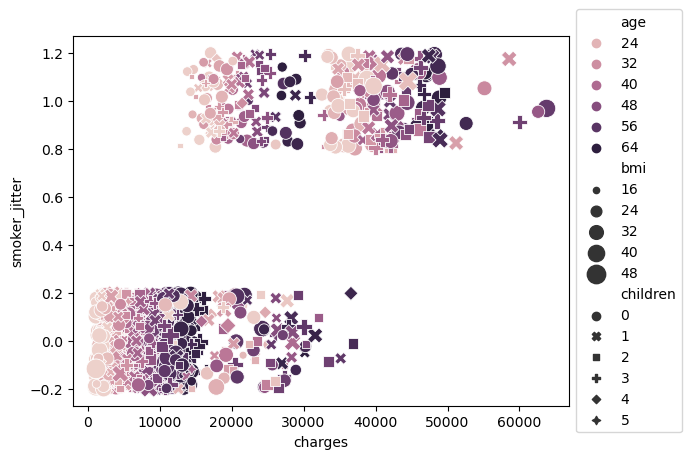

In [18]:
# Scatterplot with introduction of jitter.
sns.scatterplot(data=insuranceDF.assign(smoker_jitter=insuranceDF["smoker numerical"] 
                                        + np.random.uniform(-0.2, 0.2, len(insuranceDF))),
                x="charges", y="smoker_jitter", hue="age", size="bmi", style="children",
                sizes=(20, 200))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show();

### What would we expect based on the plot? Now that we are working with multiple dimension/features, it is much harder to visualize the data and identify patterns. 

### Let us try running the linear regression model now.

In [19]:
# Split our dataset to training and testing datasets.
logData2_tr, logData2_te = train_test_split(insuranceDF, test_size=0.1, random_state=12)
logData2_tr.reset_index(inplace=True, drop=True)
logData2_te.reset_index(inplace=True, drop=True)

# Create the X and Y matrix for model training.
logTraining2X = logData2_tr.drop(["sex", "smoker", "region", "smoker numerical"], axis=1).to_numpy()
logTraining2Y = logData2_tr["smoker numerical"].to_numpy()

# Creating the logistic regression model.
logModel2 = LogisticRegression(fit_intercept=True)
logModel2.fit(logTraining2X, logTraining2Y)

# Resulting logistic regression model parameters.
logModel2.intercept_, logModel2.coef_

(array([-0.00284263]),
 array([[-0.07542947, -0.15651044, -0.00582808,  0.00034245]]))

### After training the model, we can now use it to make predictions. Note the structure of the input and output values.

In [20]:
# Use the model to make predictions (Age, BMI, # Children, Insurance Charges).
logModel2.predict([[30, 25, 0, 3000]])

array([0])

### We should also check the accuracy of the regression model. Notice that the accuracy is improved when we incorporate additional relevant features into the model. 

In [21]:
# Create the X and Y matrix for model testing.
logTest2X = logData2_te.drop(["sex", "smoker", "region", "smoker numerical"], axis=1).to_numpy()
logTest2Y = logData2_te["smoker numerical"].to_numpy()

# The score tells you the accuracy of the regression model.
# You should use the test dataset for the score calculation.
logModel2.score(logTest2X, logTest2Y)

0.9477611940298507

### For more information, check the following:
### - User Guide: https://scikit-learn.org/stable/modules/linear_model.html
### - API Reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
### - Examples: https://scikit-learn.org/stable/auto_examples/index.html#generalized-linear-models

## ROC Curves 

### The ROC curve is used to show how well a diagnostic test can distinguish between two different groups. This is useful in evaluating the quality of our classifier model (in this case, the logistic regression model).

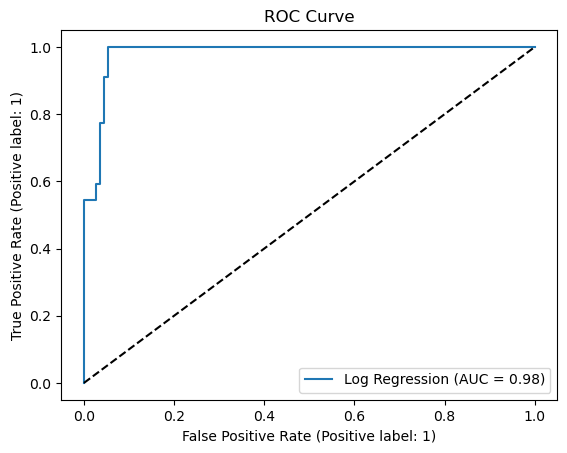

In [22]:
# Get the probability estimates of the classification, used in ROC curve.
smoker_pred = logModel2.predict_proba(logTest2X)[:, 1]

# Display the ROC curve for the logistic regression.
RocCurveDisplay.from_predictions(logTest2Y, smoker_pred, name="Log Regression")
# Produces the same result as above.
### RocCurveDisplay.from_estimator(logModel2, logTest2X, logTest2Y, name="Log Regression")

# No predictive value curve.
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.show();

### References:
### - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
### - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
### - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

**Source:**


Module adapted from Kaggle: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/notebook

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets